In [1]:
pip install everywhereml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for everywhereml: filename=everywhereml-0.2.13-py3-none-any.whl size=73056 sha256=13ba64238a32b9c7e4453426ed71efac2d33ee46d4445d90d34b89452271e947
  Stored in directory: /root/.cache/pip/wheels/a6/3b/d5/314c2cd1eb827f95646a18c8090c824a8e30964ba8ab86dbb8
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8913 sha256=8b0cb67567ded519eff77f4da55c4a9a48fc4a62ff05c9ab2017c32841d2ecd

In [2]:
#LOS DATOS
import pandas
import numpy as np

from sklearn.model_selection import train_test_split

datos = pandas.read_csv('EMGCierreRelajacion.csv', sep=";")

# Las 8 primeras columnas son los características
X= datos.values[:,:8]
# La última columna se coonvierte en los etiquetas
y= datos.values[:,8]

# Dividimos los datos en estrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=21, stratify = y)



Accuracy score:  0.9186046511627907
Precision:  0.9194322367050108
Recall:     0.92013545947781
F1_score:   0.9185936443542934


Text(56.760000000000005, 0.5, 'True value')

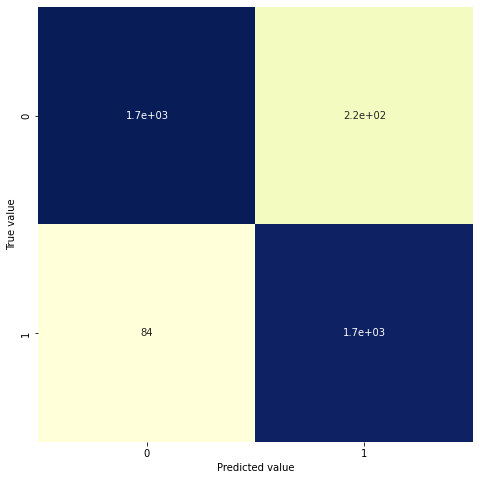

In [3]:

#############################################################################
####  RANDOM FOREST con nº de estimaciones = 50 y profundidad máxima 10 ####
#############################################################################

from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics     import accuracy_score
from sklearn.metrics     import precision_recall_fscore_support
from sklearn.metrics     import confusion_matrix

#import pandas as pd
#import string
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create an instance
model = RandomForestClassifier(n_estimators=50,max_depth=10)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict
y_pred = model.predict(X_test)

# 4. Results
print('Accuracy score: ', accuracy_score(y_test, y_pred))
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)
print('Precision: ', precision.mean())
print('Recall:    ', recall.mean())
print('F1_score:  ', f1_score.mean())

# 5. Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)

plt.figure(figsize=(8,8))
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel("Predicted value")
plt.ylabel("True value")




In [4]:

'''
  Now we convert the classifier to C++ with a single line of code
  - instance_name will create an instance of the classifier in the produced code
    (you will use this name later)
'''
# Abrir el archivo en modo de escritura
with open("ClasificadorCierre.h", "w") as f:
    # Escribir el resultado en el archivo
    f.write(model.to_arduino(instance_name='ClasificadorCierre'))
    # Cerrar el archivo
    f.close()

